¡Hola,Sarah!

Mi nombre es Tonatiuh Cruz. Me complace revisar tu proyecto hoy.

Al identificar cualquier error inicialmente, simplemente los destacaré. Te animo a localizar y abordar los problemas de forma independiente como parte de tu preparación para un rol como data-analyst. En un entorno profesional, tu líder de equipo seguiría un enfoque similar. Si encuentras la tarea desafiante, proporcionaré una pista más específica en la próxima iteración.

Encontrarás mis comentarios a continuación - **por favor no los muevas, modifiques o elimines**.

Puedes encontrar mis comentarios en cajas verdes, amarillas o rojas como esta:

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Éxito. Todo está hecho correctamente.
</div>

<div class="alert alert-block alert-warning">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Observaciones. Algunas recomendaciones.
</div>

<div class="alert alert-block alert-danger">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Necesita corrección. El bloque requiere algunas correcciones. El trabajo no puede ser aceptado con comentarios en rojo.
</div>

Puedes responderme utilizando esto: 

<div class="alert alert-block alert-info">
<b>Comentario del alumno</b> <a class="tocSkip"></a>

<div class="alert alert-block alert-success">
<b>Resumen de la revisión 1</b> <a class="tocSkip"></a>

Hola Sarah! Has hecho un excelente trabajo, cada vez más cercas de convertirte en una analista de datos. Realizaste la carga de bases, su análisis inicial, sus ajustes, un análisis de algunos variables conmplementado con gráficas y el desarrollo de las pruebas de hipótesis. Solamente te dejo algunos comentarios para complementar el análisis. 

Sigue con el excelente trabajo!
</div>

# Proyecto del módulo 1

## Descripción del proyecto Sprint 6

Trabajas para la tienda online Ice que vende videojuegos por todo el mundo. Las reseñas de usuarios y expertos, los géneros, las plataformas (por ejemplo, Xbox o PlayStation) y los datos históricos sobre las ventas de juegos están disponibles en fuentes abiertas. Tienes que identificar patrones que determinen si un juego tiene éxito o no. Esto te permitirá detectar proyectos prometedores y planificar campañas publicitarias.

Delante de ti hay datos que se remontan a 2016. Imaginemos que es diciembre de 2016 y estás planeando una campaña para 2017.

Lo importante es adquirir experiencia de trabajo con datos. Realmente no importa si estás pronosticando las ventas de 2017 en función de los datos de 2016 o las ventas de 2027 en función de los datos de 2026.

El dataset contiene una columna "rating" que almacena la clasificación ESRB de cada juego. El Entertainment Software Rating Board (la Junta de clasificación de software de entretenimiento) evalúa el contenido de un juego y asigna una clasificación de edad como Adolescente o Adulto.

## Paso 1. Abre el archivo de datos y estudia la información general 

In [153]:
#Almacena todas las librerías
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from scipy import stats as st
from scipy.stats import levene

In [154]:
#Carga el archivo de datos
df= pd.read_csv('/datasets/games.csv')

<div class="alert alert-block alert-success">
<b>Comentario del revisor:</b> <a class="tocSkip"></a>
    
Has realizado un excelente trabajo al importar los datos y las bibliotecas necesarias.

</div>

In [155]:
#Estudia la información general, analiza que contiene.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


## Paso 2.1 Prepara los datos

In [156]:
#Cambiar los nombres de columnas a minúsculas
df.columns= df.columns.str.lower()
df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


### Trabajar los valores ausentes y cambiar el tipo de dato necesario

#### Nombre

In [157]:
#Borrar estas 2 filas de 'name', ya que pierden su significado y no son tan relevantes para nuestro análisis.
df_1= df.dropna(subset=['name'],inplace=True)

#### Año de lanzamiento

In [158]:
#Valores Nan en year_of_release, se cambiará a 0, 
#ya que poner un año equivocado afectará la veracidad de nuestros datos.
df['year_of_release'].fillna(0, inplace=True)
#df['year_of_release'].value_counts()

In [159]:
#Tipo de datos a 'int'
df['year_of_release']= df['year_of_release'].astype('int')

#### Calificación de la crítica

In [160]:
#Para saber si usar la mediana o la media para llenar los valores ausentes de la columna 'critic_score', checar si hay valores atípicos
mean= df['critic_score'].mean()
median=df['critic_score'].median()
mean=mean.round()
#print(mean)
#print(median)
#No hay valores atípicos por lo que se usará mean()

In [161]:
#Los valores NaN en critic score van de 0 a 100, por lo que lo mejor es llenarlos con el valor de la media.
#print(df['critic_score'].isna().sum())
df['critic_score'].fillna(mean, inplace= True)
#df['critic_score'].value_counts()

In [162]:
#Tipo de datos a 'int'
df['critic_score']= df['critic_score'].astype('int')

#### Calificación del usuario

In [163]:
#Primero convertir los valores 'tbd' a '0', ya que no tiene ningún score aún. Van de 0-10.
df['user_score'] = df['user_score'].replace('tbd', 0)
#Segundo convertir Nan a 0, ya que tampoco tiene un score aún
df['user_score'].fillna(0, inplace=True)
#Tercero, convertir columna a tipo int
df['user_score']= df['user_score'].astype('float')

In [164]:
#Para saber si usar la mediana o la media para llenar los valores ausentes de la columna 'user_score', checar si hay valores atípicos
mean= df['user_score'].mean()
median=df['user_score'].median()
mean=mean.round()
#print(mean)
#print(median)
#Es mejor dejarlos en 0, ya que tbd, faltan en ser determinados, (to be determined)

In [165]:
#Tipo de datos a 'int'
df['user_score']= df['user_score'].astype('int')

#### Clasificación

In [166]:
#Llenar los valores ausentes de 'rating', con un str, ya que no se puede sacar mean o median a valores object.
df['rating'].fillna('unknown', inplace=True)
df['rating'].unique()
df['rating'].value_counts()
#df['rating'].isna().sum()

unknown    6764
E          3990
T          2961
M          1563
E10+       1420
EC            8
RP            3
K-A           3
AO            1
Name: rating, dtype: int64

In [167]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16713 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16713 non-null  object 
 2   year_of_release  16713 non-null  int64  
 3   genre            16713 non-null  object 
 4   na_sales         16713 non-null  float64
 5   eu_sales         16713 non-null  float64
 6   jp_sales         16713 non-null  float64
 7   other_sales      16713 non-null  float64
 8   critic_score     16713 non-null  int64  
 9   user_score       16713 non-null  int64  
 10  rating           16713 non-null  object 
dtypes: float64(4), int64(3), object(4)
memory usage: 1.5+ MB


Considero que encontramos muchos valores ausentes por que no ha habido ninguna calificación de usuario o de crítica, y por eso es que los datos no se han podido actualizar.

### Ventas totales (suma de las ventas en todas las regiones)

In [168]:
df['total_sales']= df['na_sales']+ df['eu_sales']+ df['jp_sales'] + df['other_sales']

<div class="alert alert-block alert-success">
<b>Comentario del revisor:</b> <a class="tocSkip"></a>
    
Hola! Muy buen trabajo en la sección, ajustaste los nombres de las columnas a minúsculas con el uso de la función str.lower(), cambiaste el tipo de variable de la base de datos y muy buen trabajo con la suma de todas las ventas. 


In [169]:
df

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76,8,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,69,0,unknown,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82,8,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80,8,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,69,0,unknown,31.38
...,...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,69,0,unknown,0.01
16711,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,69,0,unknown,0.01
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,69,0,unknown,0.01
16713,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,69,0,unknown,0.01


## Paso 3. Analiza los datos

#### Juegos lanzados por años

In [170]:
df['year_of_release'][df['year_of_release']> 0].min()

1980

In [171]:
df['year_of_release'][df['year_of_release']].max()

2016

<AxesSubplot:xlabel='year_of_release'>

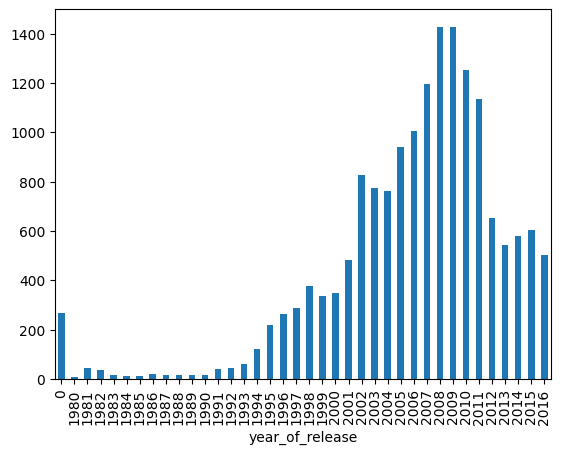

In [172]:
time_games= df.groupby('year_of_release')['name'].count()
time_games.plot(kind='bar')
#time_games
#podemos apreciar que hubo periodos donde los videojuegos eran populares, actualmente el número ha ido bajando.

<div class="alert alert-block alert-warning">
<b>Comentario del revisor:</b> <a class="tocSkip"></a>
    
Gran trabajo, solamente te recomiendo realizar una gráfica que nos ayude a entender el comportamiento del mercado de videojuegos en el tiempo



<div class="alert alert-block alert-info">
<b>Tiene razón, una gráfica ayuda a entender mejor el comportamiento del mercado de videojuegos en el transcurso de los años. </b> <a class="tocSkip"></a>

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Gran trabajo con el ajuste!

#### Cómo varían las ventas de una plataforma a otra

In [173]:
#Ventas de acuerdo a la plataforma
platform= df.groupby('platform')['total_sales'].sum().sort_values(ascending=False).head().reset_index()
platform

,platform,total_sales
0,PS2,1255.77
1,X360,971.42
2,PS3,939.65
3,Wii,907.51
4,DS,806.12


In [174]:
# Distribución basada en los datos de cada año de: PS2, X360, Wii, PS3
year_mas_0= df['year_of_release'][df['year_of_release']> 0]
ps2= df[df['platform']=='PS2']
ps2= ps2.groupby(['platform',year_mas_0])['total_sales'].sum().sort_values(ascending=False).reset_index()
#print(ps2)

x360= df[df['platform']=='X360']
x360= x360.groupby(['platform',year_mas_0])['total_sales'].sum().sort_values(ascending=False).reset_index()
#print(x360)

wii= df[df['platform']=='Wii']
wii= wii.groupby(['platform',year_mas_0])['total_sales'].sum().sort_values(ascending=False).reset_index()
#print(wii)

ps3= df[df['platform']=='PS3']
ps3= ps3.groupby(['platform',year_mas_0])['total_sales'].sum().sort_values(ascending=False).reset_index()
#print(ps3)

distribution= pd.concat([ps2, x360, wii, ps3]).reset_index()
distribution

,index,platform,year_of_release,total_sales
0,0,PS2,2004.0,211.81
1,1,PS2,2002.0,205.38
2,2,PS2,2003.0,184.31
3,3,PS2,2001.0,166.43
4,4,PS2,2005.0,160.66
5,5,PS2,2006.0,103.42
6,6,PS2,2007.0,75.99
7,7,PS2,2008.0,53.90
8,8,PS2,2000.0,39.17
9,9,PS2,2009.0,26.40


#### Plataformas que solían ser populares

In [175]:
#Los lanzamientos van de 1980 a 2016
#consideraré los populares de antes, de 1980 a 2010. Y el ahora como 2011 a 2016
#filtrar los años de 1980 a 2016
pop_before= df[(df['year_of_release']>0) & (df['year_of_release'] < 2011)]
pop_before= pop_before.groupby(['platform', 'year_of_release'])['total_sales'].sum().sort_values(ascending=False).head().reset_index()
pop_before

,platform,year_of_release,total_sales
0,PS2,2004,211.81
1,Wii,2009,206.97
2,PS2,2002,205.38
3,PS2,2003,184.31
4,Wii,2008,171.32


In [176]:
pop_now= df[df['year_of_release']>=2011]
pop_now= pop_now.groupby(['platform', 'year_of_release'])['total_sales'].sum().sort_values(ascending=False).head().reset_index()
pop_now

,platform,year_of_release,total_sales
0,PS3,2011,156.78
1,X360,2011,143.84
2,PS4,2015,118.90
3,PS3,2013,113.25
4,PS3,2012,107.36


En estos últimos 2 códigos podemos apreciar que los juegos populares en los años antes de 2011, ya no son tan populares como ahora.

#### Periodo donde obtener datos(Para construir un modelo para 2017)

In [177]:
#Un período a partir del año 2011 en adelante
period= df[df['year_of_release']>2011]

In [178]:
#¿Qué plataformas son líderes en ventas? ¿Cuáles crecen y cuáles se reducen?
period= period.groupby(['platform', 'year_of_release'])['total_sales'].sum().sort_values(ascending=False)
period.groupby('year_of_release')
period

platform  year_of_release
PS4       2015               118.90
PS3       2013               113.25
          2012               107.36
PS4       2014               100.00
X360      2012                99.74
          2013                88.58
PS4       2016                69.25
XOne      2015                60.14
3DS       2013                56.57
XOne      2014                54.07
3DS       2012                51.36
PS3       2014                47.76
3DS       2014                43.76
X360      2014                34.74
3DS       2015                27.78
XOne      2016                26.15
PS4       2013                25.99
PC        2012                23.22
WiiU      2014                22.03
Wii       2012                21.71
WiiU      2013                21.65
XOne      2013                18.96
WiiU      2012                17.56
PS3       2015                16.82
WiiU      2015                16.35
PSV       2012                16.19
3DS       2016                15.14
PC

Las plataformas líderes a partir del 2011 son PS4, Ps3, X360 y el XOne.

En 2016 X360, PS3 y XOne  han bajado notoriamente. Ps4 se mantiene todavía en lo alto.

name                                       platform
Wii Sports                                 Wii         82.54
Super Mario Bros.                          NES         40.24
Mario Kart Wii                             Wii         35.52
Wii Sports Resort                          Wii         32.77
Pokemon Red/Pokemon Blue                   GB          31.38
                                                       ...  
Assassin's Creed: Rogue                    X360         1.01
NBA Jam Tournament Edition                 SNES         1.01
Monster Rancher                            PS           1.01
Road & Track Presents: The Need for Speed  PS           1.01
Prince of Persia                           X360         1.00
Name: total_sales, Length: 2059, dtype: float64

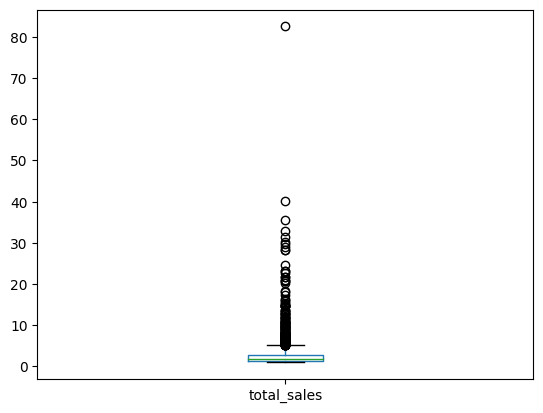

In [179]:
#Ventas globales de todos los juegos
games= df[df['total_sales']>1]
games= games.groupby(['name', 'platform'])['total_sales'].sum().sort_values(ascending=False)
games
games.plot(kind='box')
games

<div class="alert alert-block alert-warning">
    <b>Comentario del revisor</b> <a class="tocSkip"></a>
    
Muy buen trabajo con el desarrollo de la gráfica de cajas, este tipo de gráficos nos ayuda a comparar resultados de manera precisa. Solamente recuerda que los graficos de box-plot nos ayudan a identificar outliers que posteriomente en el desarrollo de las pruebas de hipótesis nos servirían eliminar para que no puedan sesgar nuestros resultados. 
</div>

<div class="alert alert-block alert-info">
<b>Disculpe, no entendí bien, el gráfico de box_plot es correcto?, o ¿cómo se puede mejorar?</b> <a class="tocSkip"></a>

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Hola, Sarah. Sí, el gráfico es correcto, solamente mi comentario estaba dirigido a que este tipo de gráficos nos ayudan a identificar valores atipicos. Por lo que si identificas en el gráfico valores atípicos puedes complementar el análisis con un análisis intercuartil para eliminar estos valores

Son significativas las diferencias en las ventas, el juego Wii Sports tien la venta más alta de todas, duplicando o triplicando a la mayoría. Las ventas promedio son lo mismo.

#### Reseñas de una plataforma

       critic_score  user_score  year_of_release  total_sales  \
0                76           8             2006        82.54   
2                82           8             2008        35.52   
3                80           8             2009        32.77   
7                58           6             2006        28.91   
8                87           8             2009        28.32   
...             ...         ...              ...          ...   
16589            69           0             2008         0.01   
16626            69           0             2010         0.01   
16664            69           0             2007         0.01   
16685            69           0             2008         0.01   
16686            69           0             2008         0.01   

                                                    name  
0                                             Wii Sports  
2                                         Mario Kart Wii  
3                                      Wii

<AxesSubplot:xlabel='total_sales', ylabel='user_score'>

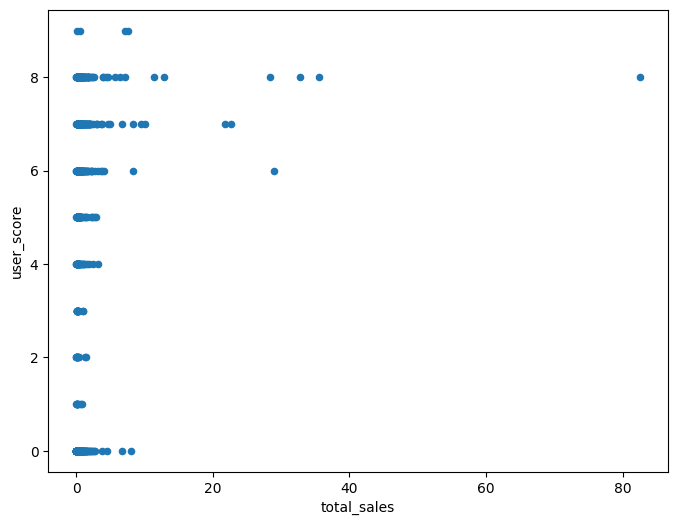

In [180]:
plat= df[df['platform']=='Wii']
plat = plat[['critic_score', 'user_score', 'year_of_release', 'total_sales', 'name']]
print(plat)
plat.plot(kind='scatter', x='total_sales', y='user_score', figsize=(8,6))

In [181]:
#Calcula la correlación entre las reseñas y las ventas
print(plat['total_sales'].corr(plat['user_score']))
print(plat['total_sales'].corr(plat['user_score']))

0.18980731516221058
0.18980731516221058


Como podemos ver 0.18 y 0.12 son correlaciones muy bajas, por lo que las reseñas no influyen mucho en el número de ventas.

#### Disculpe, me podría ayudar, ¿Cómo hago para que las reseñas 'critic_score' y 'user_score' esten como un eje y para ver la dispersión en el total de ventas?. Pregunta a mi instructor

In [182]:
#Filtré los mismos juegos de la variable plat que no son de la plataforma Wii
juego= plat['name'].tolist()
new= df[df['name'].isin(juego)]
new= df[df['platform']!='Wii']
print(new)

                                name platform  year_of_release         genre  \
1                  Super Mario Bros.      NES             1985      Platform   
4           Pokemon Red/Pokemon Blue       GB             1996  Role-Playing   
5                             Tetris       GB             1989        Puzzle   
6              New Super Mario Bros.       DS             2006      Platform   
9                          Duck Hunt      NES             1984       Shooter   
...                              ...      ...              ...           ...   
16710  Samurai Warriors: Sanada Maru      PS3             2016        Action   
16711               LMA Manager 2007     X360             2006        Sports   
16712        Haitaka no Psychedelica      PSV             2016     Adventure   
16713               Spirits & Spells      GBA             2003      Platform   
16714            Winning Post 8 2016      PSV             2016    Simulation   

       na_sales  eu_sales  jp_sales  ot

In [183]:
#Luego los agrupé por nombre de juego y tipo de plataforma, para sumar las ventas totales.
new.groupby(['name','platform'])['total_sales'].sum().sort_values(ascending=False)

name                                                                                         platform
Super Mario Bros.                                                                            NES         40.24
Pokemon Red/Pokemon Blue                                                                     GB          31.38
Tetris                                                                                       GB          30.26
New Super Mario Bros.                                                                        DS          29.80
Duck Hunt                                                                                    NES         28.31
                                                                                                         ...  
Ultimate Board Game Collection                                                               PS2          0.01
Blackthorne                                                                                  GBA          0.01
Uchida Yas

In [184]:
#Distribución general de los juegos por género
genre= df.groupby('genre')['total_sales'].sum().sort_values(ascending=True)
genre

genre
Strategy         174.23
Adventure        237.59
Puzzle           242.57
Simulation       389.97
Fighting         447.53
Racing           728.67
Misc             802.51
Platform         827.77
Role-Playing     934.56
Shooter         1052.45
Sports          1331.27
Action          1744.17
Name: total_sales, dtype: float64

Los géneros más rentables son: action, sports, shooter y role-playing.
Puedo generalizar las ventas altas y bajas con su género.

## Paso 4. Crea un perfil de usuario para cada región

#### Las 5 plataformas principales por región

In [185]:
#Las 5 plataformas principales de na_sales
plat_na= df.groupby('platform')['na_sales'].sum().sort_values(ascending=False).head()
plat_na

platform
X360    602.47
PS2     583.84
Wii     496.90
PS3     393.49
DS      382.40
Name: na_sales, dtype: float64

In [186]:
#Las 5 plataformas principales de eu_sales
plat_eu= df.groupby('platform')['eu_sales'].sum().sort_values(ascending=False).head()
plat_eu

platform
PS2     339.29
PS3     330.29
X360    270.76
Wii     262.21
PS      213.61
Name: eu_sales, dtype: float64

In [187]:
#Las 5 plataformas principales de jp_sales
plat_jp= df.groupby('platform')['jp_sales'].sum().sort_values(ascending=False).head()
plat_jp

platform
DS      175.57
PS      139.82
PS2     139.20
SNES    116.55
3DS     100.67
Name: jp_sales, dtype: float64

La plataforma DS tiene más ventas en Japón que en cualquier otra región.

La plataforma PS2 tiene más ventas en Europa que en cualquier otra región.

La plataforma X360 tiene más ventas en Norte América que en cualquier otra región.

#### Los 5 géneros principales por región

In [188]:
#Los 5 géneros principales de na_sales
genre_na= df.groupby('genre')['na_sales'].sum().sort_values(ascending=False).head()
genre_na

genre
Action      879.01
Sports      684.43
Shooter     592.24
Platform    445.50
Misc        407.27
Name: na_sales, dtype: float64

In [189]:
#Los 5 géneros principales de eu_sales
genre_eu= df.groupby('genre')['eu_sales'].sum().sort_values(ascending=False).head()
genre_eu

genre
Action     519.13
Sports     376.79
Shooter    317.34
Racing     236.51
Misc       212.74
Name: eu_sales, dtype: float64

In [190]:
#Los 5 géneros principales de jp_sales
genre_jp= df.groupby('genre')['jp_sales'].sum().sort_values(ascending=False).head()
genre_jp

genre
Role-Playing    355.41
Action          161.43
Sports          135.54
Platform        130.83
Misc            108.11
Name: jp_sales, dtype: float64

Muy interesante estos insights, descubrimos que:
el género role-playing llega a ser los juegos más vendidos en japón, mientras que los juegos de acción son los más populares en las otras regiones de norte américa y europa.


#### Si las clasificaciones de ESRB afectan a las ventas en regiones individuales.

El dataset contiene una columna "rating" que almacena la clasificación ESRB de cada juego. El Entertainment Software Rating Board (la Junta de clasificación de software de entretenimiento) evalúa el contenido de un juego y asigna una clasificación de edad como Adolescente o Adulto.

In [191]:
# ESRB en na_sales
na= df.groupby('rating')['na_sales'].sum().sort_values().reset_index()
na

,rating,na_sales
0,RP,0.00
1,AO,1.26
2,EC,1.53
3,K-A,2.56
4,E10+,353.32
5,M,748.48
6,T,759.75
7,unknown,1240.68
8,E,1292.99


In [192]:
# ESRB en eu_sales
eu= df.groupby('rating')['eu_sales'].sum().sort_values().reset_index()
eu

,rating,eu_sales
0,RP,0.08
1,EC,0.11
2,K-A,0.27
3,AO,0.61
4,E10+,188.52
5,T,427.03
6,M,483.97
7,unknown,613.30
8,E,710.25


In [193]:
# ESRB en jp_sales
jp= df.groupby('rating')['jp_sales'].sum().sort_values().reset_index()
jp

,rating,jp_sales
0,AO,0.00
1,EC,0.00
2,RP,0.00
3,K-A,1.46
4,E10+,40.20
5,M,64.24
6,T,151.40
7,E,198.11
8,unknown,841.93


In [194]:
#Merge
rating_sales= na.merge(eu, on='rating')
rating_sales= rating_sales.merge(jp, on='rating')
rating_sales

,rating,na_sales,eu_sales,jp_sales
0,RP,0.00,0.08,0.00
1,AO,1.26,0.61,0.00
2,EC,1.53,0.11,0.00
3,K-A,2.56,0.27,1.46
4,E10+,353.32,188.52,40.20
5,M,748.48,483.97,64.24
6,T,759.75,427.03,151.40
7,unknown,1240.68,613.30,841.93
8,E,1292.99,710.25,198.11


<div class="alert alert-block alert-success">
<b>Comentario del revisor:</b> <a class="tocSkip"></a>

Excelente! Con este análisis por región ayuda a complementar el análisis general anterior y a hacer zoom a los resultados por cada una de las regiones.   

</div>

## Paso 5. Prueba las siguientes hipótesis

### 1ra hipótesis: Las calificaciones promedio de los usuarios para las plataformas Xbox One y PC son las mismas.

In [195]:
#Hipótesis nula: Las calificaciones promedio de los usuarios para las plataformas Xbox One y PC son las mismas.
#Hipótesis alternativa: Las calificaciones promedio de los usuarios para las plataformas Xbox One y PC son diferentes.

In [196]:
#Filtramos los valores únicos de la columna género
df['genre'].unique()

array(['Sports', 'Platform', 'Racing', 'Role-Playing', 'Puzzle', 'Misc',
       'Shooter', 'Simulation', 'Action', 'Fighting', 'Adventure',
       'Strategy'], dtype=object)

In [197]:
#Establecemos sample_1, la columna 'user_score' de la plataforma 'XOne'
xbox_1 = df[df['platform']=='XOne']
user_score_xbox1 = xbox_1['user_score']
user_score_xbox1

99       0
165      7
179      5
242      6
270      6
        ..
16630    8
16643    6
16645    0
16660    6
16672    0
Name: user_score, Length: 247, dtype: int64

In [198]:
#Establecemos sample_2, la columna 'user_score' para la plataforma PC
pc = df[df['platform']=='PC']
user_score_pc = pc['user_score']
user_score_pc

85       7
138      7
192      4
195      0
218      8
        ..
16690    0
16692    7
16696    5
16702    7
16705    5
Name: user_score, Length: 974, dtype: int64

In [199]:
#Empezamos la ejecución de la prueba de Hipótesis
sample_1= user_score_xbox1
sample_2= user_score_pc
alpha= 0.05
leven= levene(sample_1, sample_2)
print(leven)
results= st.ttest_ind(sample_1, sample_2, equal_var=False)
#extraer el valorp
print('valor p:', results.pvalue)
print()
if results.pvalue < alpha:
    print('Rechazamos la Hipótesis nula')
else:
    print('No podemos rechazar la Hipótesis nula')
print('Las calificaciones promedio de los usuarios para las plataformas Xbox One y PC son diferentes.')

LeveneResult(statistic=0.029401425503683336, pvalue=0.863883903802843)
valor p: 0.0007016411543542439

Rechazamos la Hipótesis nula
Las calificaciones promedio de los usuarios para las plataformas Xbox One y PC son diferentes.


<div class="alert alert-block alert-info">
<b>Tengo un problema, aparecieron dos pvalue diferentes. Por qué en Levene el pvalue es 0.86 cuando debería ser menor.</b> <a class="tocSkip"></a>

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Excelente pregunta. El priber pvalue es la prueba de levene mientras que el segundo de las ttest_ind relacionada con la prueba de hipótesis

### 2da hipótesis: Las calificaciones promedio de los usuarios para los géneros de Acción y Deportes son diferentes.

In [200]:
#Hipótesis nula:Las calificaciones promedio de los usuarios para los géneros de Acción y Deportes son iguales.
#Hipótesis alternativa:Las calificaciones promedio de los usuarios para los géneros 
#de Acción y Deportes son diferentes.

In [201]:
#Establecemos sample_1, la columna 'user_score' del género Acción
action = df[df['genre']=='Action']
user_score_act = action['user_score']
user_score_act

16       8
17       9
23       8
24       8
38       8
        ..
16692    7
16694    0
16695    0
16699    0
16710    0
Name: user_score, Length: 3369, dtype: int64

In [202]:
#Establecemos sample_2, la columna 'user_score' del género Deportes
sports = df[df['genre']=='Sports']
user_score_spt = sports['user_score']
user_score_spt

0        8
3        8
13       7
15       7
77       4
        ..
16676    0
16688    0
16693    0
16700    0
16711    0
Name: user_score, Length: 2348, dtype: int64

In [203]:
#Empezamos la ejecución de la prueba de Hipótesis
sample_1= user_score_act
sample_2= user_score_spt
alpha= 0.05
#LEVENE
leven = levene(sample_1, sample_2)
print('equal_var= False, ya que el resultado de leven muestra que las varianzas no son iguales.')
print('Veredicto de la prueba de Levene:', leven)
print()
results= st.ttest_ind(sample_1, sample_2, equal_var=False)
#extraer el valorp
print('valor p:', results.pvalue)
#si el valor p resultante es mayor a 0.05, no podemos rechazar la hipótesis nula, y si es menor a 0.05, rechazamos la hipótesis nula.
if results.pvalue < alpha:
    print('Rechazamos la Hipótesis nula')
else:
    print('No podemos rechazar la Hipótesis nula')
print('Las calificaciones promedio de los usuarios para los géneros de Acción y Deportes son diferentes.')

equal_var= False, ya que el resultado de leven muestra que las varianzas no son iguales.
Veredicto de la prueba de Levene: LeveneResult(statistic=16.37948017460566, pvalue=5.2527898407462384e-05)

valor p: 6.095719434232464e-09
Rechazamos la Hipótesis nula
Las calificaciones promedio de los usuarios para los géneros de Acción y Deportes son diferentes.


 <div class="alert alert-block alert-danger">
<b>Comentario revisor</b> <a class="tocSkip"></a>

Para estas pruebas te recomiendo hacer una prueba de  Levene  para mostrar si las varianzas son iguales y agregarlo dentro de la función. Actualmente lo colocar como equal_var=False. Para esto, primero debes calcular las varianzas para cada uno de las plataformas y en un segundo tiempo debes de hacer uso de la siguiente función: 
    
    levene(sample_1, sample_2)
    
Adoptaremos un nivel de significancia de 0.05; si el valor p resultante es mayor a 0.05, no podemos rechazar la hipótesis nula, y si es menor a 0.05, rechazamos la hipótesis nula, indicando que las varianzas no son iguales. 
    
Solamente recuerda que la prueba de levene no es sustituto a la prueba de st.ttest_ind, más bien es complemento para saber que colocar dentro del elemento "equal_var". En este caso como rechazamos la hipótesis de varianzas iguales debemos de colocar False. Es por eso que para terminar la prueba debes de realizar la prueba de st.ttest_ind considernado el resultado de la prueba realizada de levene    
</div>

<div class="alert alert-block alert-info">
<b>Hola, gracias por el comentario, pero entonces porque en la teoría del sprint no vimos la prueba Levene. Muy buena explicación, ya corregí mi código, gracias. Podría agregar usted un ejemplo de como debería haber quedado el código con la prueba levene y st.ttest por favor.</b> <a class="tocSkip"></a>

 <div class="alert alert-block alert-info">
<b>Comentario revisor</b> <a class="tocSkip"></a>

Claro, te dejo cómo se vería un ejemplo:

    levene_p = st.levene(sample_1, sample_2)

    # Después usamos directamente el resultado de la prueba de levene
    results = st.ttest_ind(sample_1, sample_2, equal_var=(levene_p >= 0.05))


Tu proyecto se encuentra listo para aprobarse pero voy a esperar por si tuvieras alguna otra duda    

<div class="alert alert-block alert-info">
<b> Gracias por todo Tonatiuh, ninguna otra duda, gracias por esperar. </b> <a class="tocSkip"></a>

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Excelente. Sigue disfrutando los siguientes cursos

#### ¿Cómo formulaste las hipótesis nula y alternativa?

Dentro de la probabilida la hipótesis nula (H0) y la hipótesis alternativa (Ha) se establecen de la siguiente manera:
1. La hipótesis nula siempre representa la "no diferencia" o la "no hay efecto".

   Es la afirmación que se asume como verdadera hasta que la evidencia estadística demuestre lo contrario.
3. La hipótesis alternativa es lo que intentamos probar o lo que se cree que es verdadero si la hipótesis nula resulta ser falsa.

   Es la afirmación de que hay una diferencia, un efecto o un cambio.

#### Qué criterio utilizaste para probar las hipótesis y porqué

Tomé el criterio de: La hipótesis sobre la igualdad de las medias de 2 poblaciones.

Con la función: scipy.stats.ttest_ind(array1, array1, equal_var).

Con este criterio se prueba la hipótesis de que las medias de las dos poblaciones independientes son iguales.

## Paso 6. Escribe una conclusión general

Este proyecto del sprint 6, ha ayudado a descubrir estos valiosos insights:
1. Se encontraron varios valores ausentes, ya que parece que no tienen una calificación en juegos aún.

2. Parece ser que el juego 'Wii Sports' de la plataforma Wii, del año 2006, tuvo el mayor número de ventas de todos los juegos con 82.54 millones de dólares, duplicando o triplicando al promedio, convirtiendose en un valor atípico, el mayor número de ventas se encontró en Norte América.

3. Los datos de los años de lanzamiento van de 1980 a 2016.

4. Del 2006 a 2011, fue el periodo con más lanzamientos de juegos. A partir de 2011 en adelante los juegos han ido disminuyendo.

5. A lo largo de los años las plataformas: PS2, X360, PS3, Wii, DS, son las plataformas con más ventas, el primero siendo PS2 con ventas de 1255.77 millones de dólares.

6. Las plataformas más populares antes del 2011 fueron: PS2 y el Wii, pero en la actualidad las plataformas PS4, PS3 y X360 los han reemplazado.

7. En 2016 X360, PS3 y XOne han bajado notoriamente. Ps4 se mantiene todavía en lo alto.

8. Dado a que calculamos la correlacion entre las reseñas y el total de ventas en plataform de Wii, concluimos que las reseñas no influyen mucho en el número de ventas.

9. Se pudo leer elcomportamiento de usuarios dpeendiendo de su región y encontramos grandes diferencias en las preferencias de juego en su género como las plataformas.

10. Por ultimo formulamos hipótesis y obtuvimos que:
Las calificaciones promedio de los usuarios para las plataformas Xbox One y PC son diferentes.
Las calificaciones promedio de los usuarios para los géneros de Acción y Deportes son diferentes.
